# Data Preprocessing

# Content

- Data Preprocessing
- Load data from postgres
- Data Information
- Data Manipulation
    - Missing Value Manipulation
    - Fixing missing values
    - Droping Duplicate values
- Show Data Description
- Outliers
    - Fix Outliers
- Save Cleaned Data

# Data Preprocessing

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing script modules from ../scripts
# Adding scripts path
import sys, os
sys.path.insert(0, '../scripts/')
from data_preProcessing import data_preProcessing_script
from data_manipulator import DataCleaner
from data_exploration import exploration

# Load Data From Postgres

In [3]:
import psycopg2 as pg

In [4]:
engine = pg.connect("dbname='postgres' user='postgres' host='127.0.0.1' port='5432' password='abel6464'")
df_cpy = pd.read_sql('select * from merged LIMIT 50000', con=engine)

In [5]:
df = df_cpy.copy(deep=True)

In [6]:
df.head()

,game_key,campaign_id,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,colors_clickthr_green,colors_clickthr_blue,colors_clickthr_proportion,colors_clickthr_saturation,colors_clickthr_luminosity,videosd,eng_type,direction,adunit_sizex,adunit_sizey
0,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291,Thailand,www.wuxiaworld.com,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298,Thailand,www.wuxiaworld.com,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
2,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693,Thailand,www.prachachat.net,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
3,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188,Thailand,www.prachachat.net,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
4,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047,Thailand,www.prachachat.net,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN


# Data Information

In [7]:
preprocess = data_preProcessing_script(df)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   game_key                                           50000 non-null  object        
 1   campaign_id                                        50000 non-null  object        
 2   type                                               50000 non-null  object        
 3   width                                              50000 non-null  object        
 4   height                                             50000 non-null  object        
 5   creative_id                                        50000 non-null  object        
 6   auction_id                                         50000 non-null  object        
 7   browser_ts                                         50000 non-null  datetime64[ns]
 8   geo_country     

In [8]:
print('unique column values')
df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(33)

unique column values


browser_ts                      49533
auction_id                      42216
site_name                        4030
creative_id                       260
game_key                          155
campaign_name                      39
campaign_id                        39
browser                            27
Description                        24
Submission Date                    24
startdate                          20
enddate                            18
Gross Cost/Budget                  17
Volume Agreed                      17
Net Cost                           16
Buy Rate (CPE)                     14
Campaign Objectives                13
colors_engagement_proportion       12
text_clickthr                      12
labels_engagement                  12
labels_clickthr                    12
Serving Location(s)                11
colors_engagement_luminosity       11
text_engagement                    11
colors_engagement_green            11
colors_clickthr_proportion         11
colors_click

In [9]:
df.shape

(50000, 54)

# Data Manipulation

## Missing Value Manipulation

In [10]:
preprocess.colums_WithMissingValue()

['browser',
 'Delivery Requirements (Black/Audience/White List)',
 'Buy Rate (CPE)',
 'Volume Agreed',
 'Gross Cost/Budget',
 'Agency Fee',
 'Percentage',
 'Flat Fee',
 'Net Cost',
 'labels_engagement',
 'labels_clickthr',
 'text_engagement',
 'text_clickthr',
 'colors_engagement_red',
 'colors_engagement_green',
 'colors_engagement_blue',
 'colors_engagement_proportion',
 'colors_engagement_saturation',
 'colors_engagement_luminosity',
 'colors_clickthr_red',
 'colors_clickthr_green',
 'colors_clickthr_blue',
 'colors_clickthr_proportion',
 'colors_clickthr_saturation',
 'colors_clickthr_luminosity',
 'videosd',
 'eng_type',
 'direction',
 'adunit_sizex',
 'adunit_sizey']

In [11]:
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
game_key,0,0.0 %
campaign_id,0,0.0 %
type,0,0.0 %
width,0,0.0 %
height,0,0.0 %
creative_id,0,0.0 %
auction_id,0,0.0 %
browser_ts,0,0.0 %
geo_country,0,0.0 %
site_name,0,0.0 %


Text(0, 0.5, 'Features')

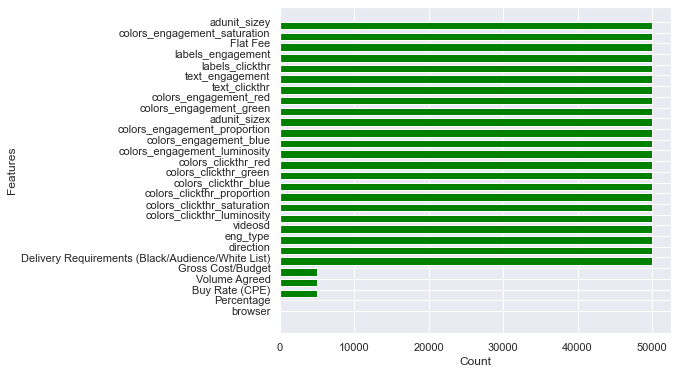

In [13]:
#cols_with_missing = [col for col in train.columns if train[col].isnull().any()]
cols_with_missing = df.isnull().sum()
cols_with_missing = cols_with_missing[cols_with_missing>0]
cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))  
width = 0.70 # the width of the bars 
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count')
plt.ylabel('Features') 

---
- We will remove missing values > 80%
- Since we have missing values on computer vision extracted data's, we will not drop them since they might have some insights even if they are > 80% missing
- There aren't much computer vision data collected for the same game key as in the inventory dataset. That might be some of the limitations of this dataset.
---

## Fixing missing values

In [12]:
df.drop(["Flat Fee"], axis=1, inplace=True)
df.drop(["Delivery Requirements (Black/Audience/White List)"], axis=1, inplace=True)

In [13]:
df['width'].fillna(df['width'].mode()[0], inplace = True)
df['height'].fillna(df['height'].mode()[0], inplace = True)
df['geo_country'].fillna(df['geo_country'].mode()[0], inplace = True)
df['device_type'].fillna(df['device_type'].mode()[0], inplace = True)
df['browser'].fillna(df['browser'].mode()[0], inplace = True)
df['Buy Rate (CPE)'].fillna(df['Buy Rate (CPE)'].median(), inplace = True)
df['Volume Agreed'].fillna(df['Volume Agreed'].median(), inplace = True)
df['Gross Cost/Budget'].fillna(df['Gross Cost/Budget'].median(), inplace = True)
df['Percentage'].fillna(df['Percentage'].median(), inplace = True)
df['Agency Fee'].fillna(df['Agency Fee'].mode()[0], inplace = True)
df['Net Cost'].fillna(df['Net Cost'].median(), inplace = True)
# 
df['labels_engagement'].fillna(df['labels_engagement'].mode()[0], inplace = True)
df['labels_clickthr'].fillna(df['labels_clickthr'].mode()[0], inplace = True)
df['text_engagement'].fillna(df['text_engagement'].mode()[0], inplace = True)
df['text_clickthr'].fillna(df['text_clickthr'].mode()[0], inplace = True)
# 
df['colors_engagement_red'].fillna(df['colors_engagement_red'].median(), inplace = True)
df['colors_engagement_green'].fillna(df['colors_engagement_green'].median(), inplace = True)
df['colors_engagement_blue'].fillna(df['colors_engagement_blue'].median(), inplace = True)
df['colors_engagement_proportion'].fillna(df['colors_engagement_proportion'].median(), inplace = True)
df['colors_engagement_saturation'].fillna(df['colors_engagement_saturation'].median(), inplace = True)
df['colors_engagement_luminosity'].fillna(df['colors_engagement_luminosity'].median(), inplace = True)
# 
df['colors_clickthr_red'].fillna(df['colors_clickthr_red'].median(), inplace = True)
df['colors_clickthr_green'].fillna(df['colors_clickthr_green'].median(), inplace = True)
df['colors_clickthr_blue'].fillna(df['colors_clickthr_blue'].median(), inplace = True)
df['colors_clickthr_proportion'].fillna(df['colors_clickthr_proportion'].median(), inplace = True)
df['colors_clickthr_saturation'].fillna(df['colors_clickthr_saturation'].median(), inplace = True)
df['colors_clickthr_luminosity'].fillna(df['colors_clickthr_luminosity'].median(), inplace = True)
# 
df['videosd'].fillna(df['videosd'].median(), inplace = True)
df['eng_type'].fillna(df['eng_type'].mode()[0], inplace = True)
df['direction'].fillna(df['direction'].mode()[0], inplace = True)
# 
df['adunit_sizex'].fillna(df['adunit_sizex'].median(), inplace = True)
df['adunit_sizey'].fillna(df['adunit_sizey'].median(), inplace = True)

In [14]:
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
game_key,0,0.0 %
campaign_id,0,0.0 %
type,0,0.0 %
width,0,0.0 %
height,0,0.0 %
creative_id,0,0.0 %
auction_id,0,0.0 %
browser_ts,0,0.0 %
geo_country,0,0.0 %
site_name,0,0.0 %


# Droping Duplicate values

In [16]:
# Duplicate
df[df.duplicated()].index

Int64Index([ 3363,  8014,  9190,  9192, 12413, 12415, 14130, 14283, 15875,
            16233, 16257, 20098, 23538, 24732, 27618, 28123, 28940, 30794,
            30821, 31035, 31848, 33228, 38043, 38149, 43888, 43892, 43911,
            43924, 44754, 44784, 47675, 47746, 48053, 49088, 49148],
           dtype='int64')

In [17]:
preprocess.drop_duplicates()

In [18]:
# Duplicate
df[df.duplicated()].index

Int64Index([], dtype='int64')

# Show Data Description

In [19]:
preprocess.show_data_description()

,Buy Rate (CPE),Volume Agreed,Gross Cost/Budget,Percentage,Net Cost,colors_engagement_red,colors_engagement_green,colors_engagement_blue,colors_engagement_proportion,colors_engagement_saturation,colors_engagement_luminosity,colors_clickthr_red,colors_clickthr_green,colors_clickthr_blue,colors_clickthr_proportion,colors_clickthr_saturation,colors_clickthr_luminosity,videosd,adunit_sizex,adunit_sizey
count,49965.000000,4.996500e+04,4.996500e+04,49965.000000,4.996500e+04,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.000000,49965.0,49965.000000
mean,1.787755,1.709223e+05,7.493333e+04,6.026719,7.211759e+04,215.872771,219.886721,93.035905,0.405528,0.488079,0.496075,71.051276,109.035625,77.044531,0.418132,0.211254,0.355045,0.000500,600.0,899.751826
std,3.937988,2.126577e+05,7.772118e+04,7.345368,7.765766e+04,5.361222,4.766606,4.220400,0.007757,0.013962,0.013260,3.227276,2.552243,2.917809,0.004756,0.010131,0.009602,0.022363,0.0,9.960416
min,0.270000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.165923,0.000000,0.000000,22.000000,50.000000,1.000000,0.175426,0.000000,0.215686,0.000000,600.0,500.000000
25%,0.330000,4.033600e+04,2.541168e+04,0.000000,2.159993e+04,216.000000,220.000000,93.000000,0.405483,0.488000,0.496078,71.000000,109.000000,77.000000,0.418193,0.211111,0.354902,0.000000,600.0,900.000000
50%,0.400000,1.515151e+05,5.000000e+04,0.000000,5.000000e+04,216.000000,220.000000,93.000000,0.405483,0.488000,0.496078,71.000000,109.000000,77.000000,0.418193,0.211111,0.354902,0.000000,600.0,900.000000
75%,0.630000,2.142857e+05,1.300000e+05,15.000000,1.105000e+05,216.000000,220.000000,93.000000,0.405483,0.488000,0.496078,71.000000,109.000000,77.000000,0.418193,0.211111,0.354902,0.000000,600.0,900.000000
max,13.000000,5.963333e+06,1.789000e+06,15.000000,1.789000e+06,254.000000,254.000000,254.000000,0.717262,1.000000,0.996078,254.000000,254.000000,254.000000,0.581110,0.992157,0.996078,1.000000,600.0,900.000000


In [20]:
preprocess.show_datatypes()

game_key                                       object
campaign_id                                    object
type                                           object
width                                          object
height                                         object
creative_id                                    object
auction_id                                     object
browser_ts                             datetime64[ns]
geo_country                                    object
site_name                                      object
platform_os                                    object
device_type                                    object
browser                                        object
campaign_name                                  object
Submission Date                        datetime64[ns]
Description                                    object
Campaign Objectives                            object
kpis                                           object
Placement(s)                

In [21]:
#Knowing the shapes of our datasets
print('Shapes of our datasets')
print('-----------------------')
print(f'Training dataset:{df.shape}')

Shapes of our datasets
-----------------------
Training dataset:(49965, 52)


In [22]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Buy Rate (CPE),49965.000000,1.787755,3.937988,0.270000,0.330000,0.400000,0.630000,13.000000
Volume Agreed,49965.000000,170922.270792,212657.654454,0.000000,40336.000000,151515.150000,214285.710000,5963333.330000
Gross Cost/Budget,49965.000000,74933.330687,77721.179144,0.000000,25411.680000,50000.000000,130000.000000,1789000.000000
Percentage,49965.000000,6.026719,7.345368,0.000000,0.000000,0.000000,15.000000,15.000000
Net Cost,49965.000000,72117.593100,77657.658546,0.000000,21599.930000,50000.000000,110500.000000,1789000.000000
colors_engagement_red,49965.000000,215.872771,5.361222,0.000000,216.000000,216.000000,216.000000,254.000000
colors_engagement_green,49965.000000,219.886721,4.766606,0.000000,220.000000,220.000000,220.000000,254.000000
colors_engagement_blue,49965.000000,93.035905,4.220400,0.000000,93.000000,93.000000,93.000000,254.000000
colors_engagement_proportion,49965.000000,0.405528,0.007757,0.165923,0.405483,0.405483,0.405483,0.717262
colors_engagement_saturation,49965.000000,0.488079,0.013962,0.000000,0.488000,0.488000,0.488000,1.000000


# Outliers

In [23]:
from data_exploration import exploration
exploration = exploration()

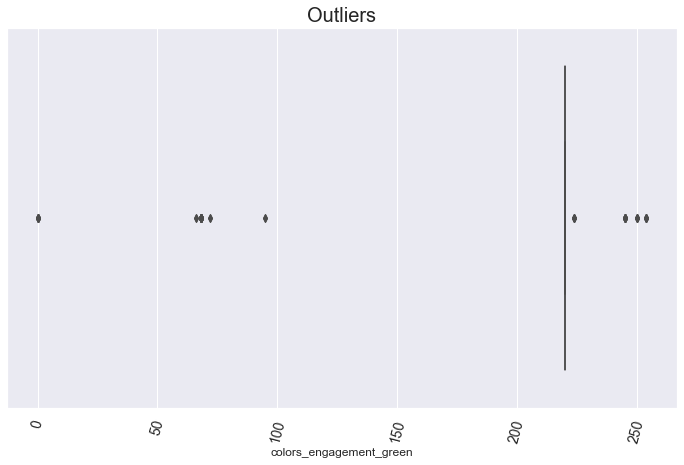

In [24]:
exploration.plot_box(df, "colors_engagement_green", "Outliers")

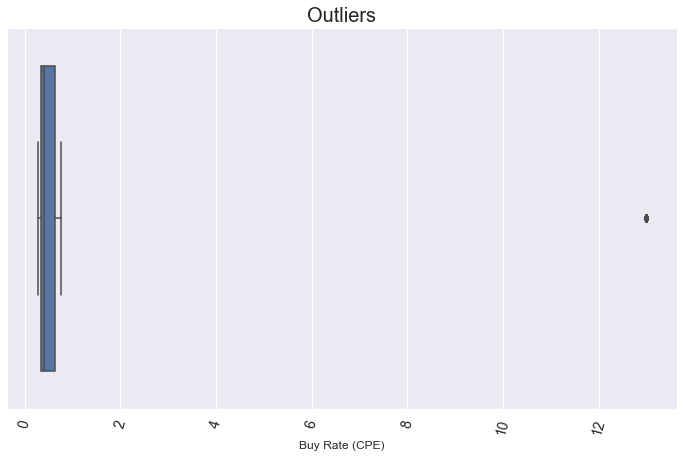

In [25]:
exploration.plot_box(df, "Buy Rate (CPE)", "Outliers")

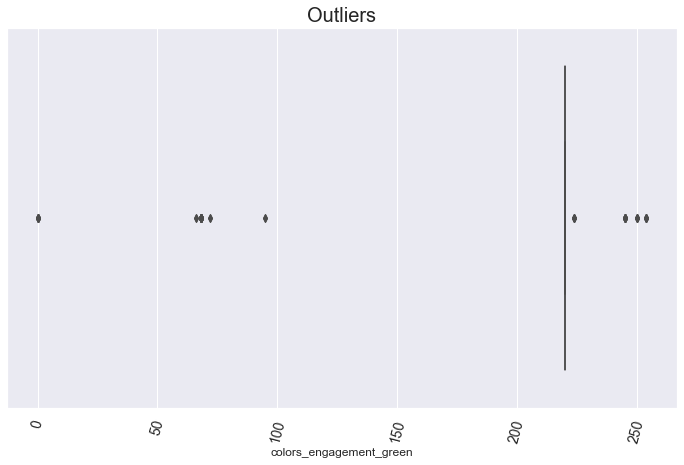

In [26]:
exploration.plot_box(df, "colors_engagement_green", "Outliers")

# Fix Outliers

In [27]:
from data_manipulator import DataCleaner
manipulator = DataCleaner(df)

In [28]:
columns = ['Buy Rate (CPE)', 'Volume Agreed',
'Gross Cost/Budget', 'Percentage','Net Cost', 'colors_engagement_red',
'colors_engagement_green',
'colors_engagement_blue',
'colors_engagement_proportion',
'colors_engagement_saturation',
'colors_engagement_luminosity',
'colors_clickthr_red',
'colors_clickthr_green',
'colors_clickthr_blue',
'colors_clickthr_proportion',
'colors_clickthr_saturation',
'colors_clickthr_luminosity',
'adunit_sizex',
'adunit_sizey']

In [29]:
manipulator.replace_outlier_with_median(df, columns)

,game_key,campaign_id,type,width,height,creative_id,auction_id,browser_ts,geo_country,site_name,...,colors_clickthr_green,colors_clickthr_blue,colors_clickthr_proportion,colors_clickthr_saturation,colors_clickthr_luminosity,videosd,eng_type,direction,adunit_sizex,adunit_sizey
0,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.291,Thailand,www.wuxiaworld.com,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
1,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,fd74243f-6606-4830-a0ef-dd12f66ec6f5,2021-01-01 19:55:20.298,Thailand,www.wuxiaworld.com,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
2,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,tf2htrrm,b3af878b-fd1a-4c6f-91a2-4e3670d2fda5,2021-01-05 00:21:39.693,Thailand,www.prachachat.net,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
3,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:44.188,Thailand,www.prachachat.net,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
4,adunit-facebook-conversational-commerce-phase-...,l5kk3r3,impression,%,%,x83byc8a,b7c22590-e784-43cf-874d-a661ad99601f,2021-01-06 09:30:45.047,Thailand,www.prachachat.net,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,82d6d13da53d863132e82cab28f376ab/5ecfa6a8bf1ba...,zqb4z95,impression,300,250,1oseccn9,eb96831c-bfaf-4285-802a-9004da6ea6ac,2021-03-15 06:39:50.022,United States,fanspeak.com,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
49996,5d8ff369f6297025af1040d6b7cdbcd6/8dd1fc677f788...,zqb4z95,impression,320,480,sbuh5b98,f0a57f14-21e5-47d4-aad3-de0057f9acbc,2021-03-15 06:39:50.642,United States,www.supercheats.com,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
49997,5d8ff369f6297025af1040d6b7cdbcd6/8dd1fc677f788...,zqb4z95,impression,320,480,sbuh5b98,6f7b1645-d6b8-4454-8cf3-b1b346f70a17,2021-03-15 06:39:51.098,United States,zinmanga.com,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0
49998,5d8ff369f6297025af1040d6b7cdbcd6/8dd1fc677f788...,zqb4z95,impression,320,480,sbuh5b98,17651148-402e-45c4-9fc8-802e58345731,2021-03-15 06:39:58.436,United States,www.supercheats.com,...,109.0,77.0,0.418193,0.211111,0.354902,0.0,swipe,up,600.0,900.0


# Saving new processed File

In [30]:
df.to_csv('../data/processed_incl_missing.csv', index=False)
# df_copy.to_csv('../data/processed_drop_missing.csv', index=False)